# 10 Parameter Estimation

In [1]:
%load_ext pymatbridge

C:\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket tcp://127.0.0.1:21783
Send 'exit' command to kill the server
......MATLAB started and connected!


## 10.1 Introduction

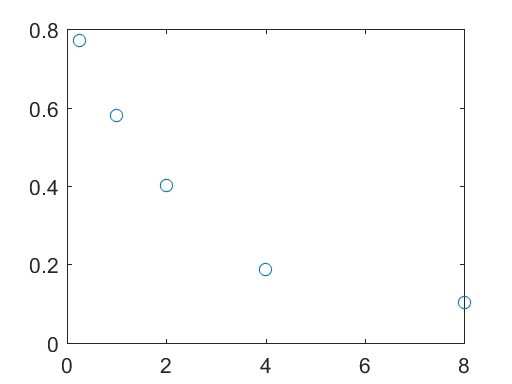

In [16]:
%%matlab
tfit = [0.25 1 2 4 8];
cfit = [0.7716 0.5791 0.4002 0.1860 0.1019];
plot(tfit, cfit, 'o')

## 10.2 Polynomial Curve Fitting


p =

    0.0181   -0.2326    0.8099



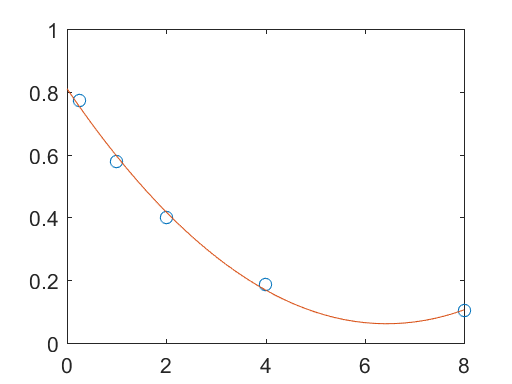

In [8]:
%%matlab
tfit = [0.25 1 2 4 8];
cfit = [0.7716 0.5791 0.4002 0.1860 0.1019];
p = polyfit(tfit, cfit, 2);
p
c = polyval(p, [0:0.2:8]);
plot(tfit, cfit, 'o', [0:0.2:8], c, '-')

In [9]:
%%matlab
c = polyval(p, tfit);
resc = cfit - c


resc =

    0.0187   -0.0163   -0.0168    0.0175   -0.0031



In [11]:
%%matlab
sqrt(sum(resc.*resc))/5


ans =

    0.0070



In [13]:
%%matlab
normc = sqrt(sum(resc.*resc))
norm(resc)
norm(resc, 2)


normc =

    0.0348


ans =

    0.0348


ans =

    0.0348



In [14]:
%%matlab
c = polyval([0.0015 -0.1078 2.0315],tfit);
normc = norm (cfit-c)


normc =

    2.9623



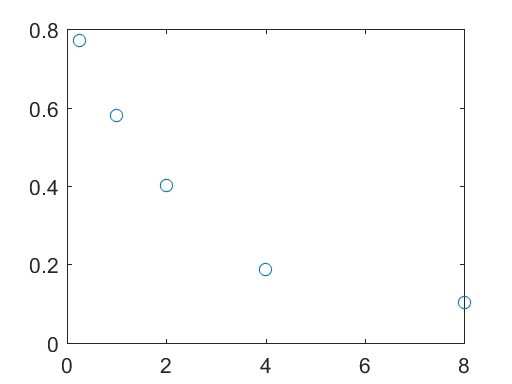

In [15]:
%%matlab
plot(tfit,cfit,'o')

## 10.3 Exponential Curve Fitting

In [19]:
%%matlab
p = polyfit(tfit,log(cfit),1);
p


p =

   -0.2619   -0.3387



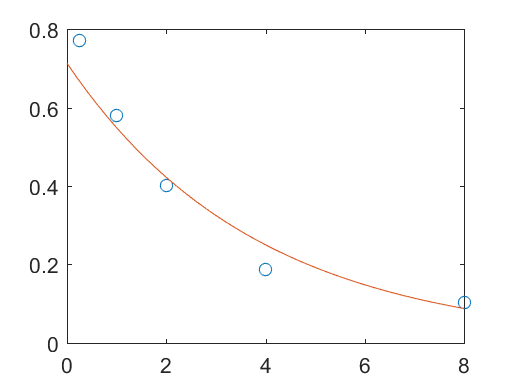

In [20]:
%%matlab
c = exp(polyval(p, [0:.2:8]));
plot(tfit, cfit, 'o', [0:.2:8], c, '-');

In [21]:
%%matlab
c = polyval(p, tfit);
normc = norm(cfit-c)


normc =

    3.6427



In [22]:
%%matlab
c = exp(-tfit);
normc = norm(cfit - c)


normc =

    0.3915



## 10.4 Parameter Estimation with Derivatives

In [23]:
%%matlab
fzero(@cos, 0.11)


ans =

    1.5708



In [24]:
%%matlab
fzero(@cos, 4.11)


ans =

    4.7124



In [ ]:
# %load ch10/par_esta.m
function par_esta
% parameter estimation with derivatives          Holzbecher September 2005
% for exponential fit for c0 
global tfit cfit lambda

% specify fitting data
tfit =  [0.25 1 2 4 8]; %[0 5 18 30 50];
cfit = [0.7716 0.5791 0.4002 0.1860 0.1019]; %[2.3 1.18 0.52 0.23 0.13]; 
lambda = .3329;

c0 = fzero(@myfun,1);
normc = norm(cfit - c0*exp(-lambda*tfit));
display (['Best fit for c0 = ' num2str(c0)]);
display (['Norm of residuals =' num2str(normc)]);
tmax = tfit(size(tfit,2));
t = [0:0.01*tmax:tmax];
figure; plot (tfit,cfit,'or',t,c0*exp(-lambda*t),'-');
legend ('given','modelled');
text(0.5*tmax,c0*0.7,['c_0: ' num2str(c0)]); 
text(0.5*tmax,c0*0.6,['norm of residuals: ' num2str(normc)]);
xlabel ('time');
ylabel ('concentration');

function f = myfun(c0) 
global tfit cfit lambda

c = c0*exp(-lambda*tfit); % solve linear decay equation for c with c(0)=c0
cc0 = exp(-lambda*tfit);  % equation for dc/dc0
f = (c-cfit)*cc0';        % specify function f to vanish


In [ ]:
# %load ch10/par_estb.m
function par_estb
% parameter estimation with derivatives                 Holzbecher Dez 2010
% for exponential fit with c0 and lambda as parameters
global tfit cfit c0

% specify fitting data
tfit = [0.25 1 2 4 8]; 
cfit = [0.7716 0.5791 0.4002 0.1860 0.1019];
c0 = 0.816; lambda = 0.333;      % start values

lambda = fzero(@myfun,lambda);
normc = norm(cfit - c0*exp(-lambda*tfit));
display (['Best fit for lambda = ' num2str(lambda)]);
display (['Best fit for c0 = ' num2str(c0)]);
display (['Norm of residuals =' num2str(normc)]);
tmax = tfit(size(tfit,2));
t = [0:0.01*tmax:tmax];
plot (tfit,cfit,'or',t,c0*exp(-lambda*t),'-');
legend ('given','modelled');
text(0.5*tmax,c0*0.8,['\lambda:' num2str(lambda)]); 
text(0.5*tmax,c0*0.7,['c_0:' num2str(c0)]); 
text(0.5*tmax,c0*0.6,['norm of residuals: ' num2str(normc)]);

function f = myfun(lambda) 
global tfit cfit c0 

options = optimset; 
c0 = fzero(@myfun2,c0,options,lambda);
display (['Best fit for c0 = ' num2str(c0)]);

c = c0*exp(-lambda*tfit);    % solve linear decay equation for c with c0
clambda = -c.*tfit;          % equation for dc/dlambda
f = (c-cfit)*clambda';       % specify function f to vanish

function f = myfun2(c0,lambda) 
global tfit cfit

c = c0*exp(-lambda*tfit);    % solve linear decay equation for c with c(0)=1 
cc0 = exp(-lambda*tfit);     % equation for dc/dc0
f = (c-cfit)*cc0';           % specify function f to vanish


## 10.5 Transport Parameter Fitting

In [ ]:
# %load ch10/par_estc.m
function par_estc   
% transport parameter estimation with derivatives             Holzbecher January 2006

global xfit cfit T D c0 c1

% Example values for Chlorid in Marmara Sea Sediment Core              
T = 3.15e11;  % [s] 10.000 years 
D = 1.0e-5;  % [cm*cm/s]
c0 = 0;      % [mmol/l]
c1 = 619;    % [mmol/l]
xmax = 4000; % [cm]

% specify fitting data
xfit = [0 20 40 60 100 120 140 160 215 255 275 300 375 450 525 600 750 1050 1200 1350 1650 1950 2250 2550 2700 3000 3450 3900];
cfit = [619 597 608 615 619 615 621 571 621 618 619 625 577 612 608 612 609 590 582 582 556 494 457 489 487 444 381 371];

x = [0:xmax/400:xmax];
options = optimset('Display','iter','TolFun',1e-9);
v = fzero(@myfun,0.2e-8,options);
display (['Best fit for v = ' num2str(v)]);

h = 1./(2.*sqrt(D*T)); e = diag(eye(size(x,2))); 
plot (xfit,cfit,'o',x,c0+0.5*c1*(erfc(h*(x-v*T*e'))+(exp((v/D)*x)).*erfc(h*(x+v*T*e'))),'-');
legend ('given','modelled');
xlabel ('depth [cm]'); ylabel ('chloride concentration [mmol/l]');
text(0.1*xmax,c1*0.65,['sedimentation velocity [cm/a]: ' num2str(v*3.15e7)]);
e = diag(eye(size(xfit,2))); 
normc = norm(cfit-c0+0.5*c1*(erfc(h*(xfit-v*T*e'))+(exp((v/D)*xfit)).*erfc(h*(xfit+v*T*e'))));
text(0.1*xmax,c1*0.6,['norm of residuals: ' num2str(normc)]);

function f = myfun(v) 
global xfit cfit T D c0 c1

e=diag(eye(size(xfit,2))); h=1./(2.*sqrt(D*T));
arg1 = h*(xfit-v*T*e'); arg2 = h*(xfit+v*T*e'); arg3 = (v/D)*xfit;

% solve advection diffusion equation for c with c(t=0)=c0 and c(x=0)=c1 
c = c0 + 0.5*c1*(erfc(arg1)+(exp(arg3).*erfc(arg2)));

% compute derivative of solution due to v
cv = c1*((T*h/sqrt(pi))*(exp(-arg1.*arg1)-exp(arg3).*exp(-arg2.*arg2))+0.5*(xfit/D).*exp(arg3).*erfc(arg2));

% specify function f to vanish
f = 2*(c-cfit)*cv';



## 10.6 General Procedure

In [ ]:
# %load ch10/par_est2a.m
function par_est2a
% parameter estimation with derivatives                      Holzbecher September 2005
% using differential equations
% Idea from FEMLAB - there R instead of Q 
% see COMSOL News, Nr. 1, 2005, page 15
global xfit cfit Q

% specify fitting data
xfit = [0.05:0.1:0.95];
cfit = [0.9256859756097451       0.7884908536585051       0.6665396341462926...
        0.559832317073104        0.4683689024389414       0.39214939024380824...
        0.33117378048770196      0.28544207317062964      0.25495426829258294      0.23971036585356142];      
Q = -2;
D = fzero(@myfun,1.8);
display (['Best fit for D = ' num2str(D)]);
x = [0:0.01:1];
plot (xfit,cfit,'o',x,-(Q/D/2)*x.*x + (Q/D)*x + 1,'-');
legend ('given','modelled');
xlabel ('x'); ylabel ('c');

function f = myfun(D) 
global xfit cfit Q

options = bvpset;
% solve diffusion equation for c with c(0)=1 and dc/dx(1)=0 
solinit = bvpinit([0 xfit 1],@guess);
c = bvp4c (@mat4ode,@mat4bc,solinit,options,Q/D,1);
%plot (c.x,c.y(1,:),'r',xfit,-(Q/D/D)*xfit.*xfit+(Q/D)*xfit+ones(1,size(xfit,2)));

% solve Poisson equation for dc/dD (cD) with boundary conditions
solinit = bvpinit([0 xfit 1],@guess1);
cD = bvp4c (@mat4ode,@mat4bc,solinit,options,Q/D/D,0);

% specify function f to vanish
f = 2*(c.y(1,2:size(c.y,2)-1)-cfit)*cD.y(1,2:size(c.y,2)-1)';

function dydx = mat4ode(x,y,Q,c0)
dydx = [y(2); -Q];
% ------------------------------------------------------------
function res = mat4bc(y0,y1,Q,c0)
res = [y0(1)-c0; y1(2)];
% ------------------------------------------------------------
function v = guess(x)
v = [x*(x-2)+1; 2*(x-1)];
% ------------------------------------------------------------
function v = guess1(x)
v = [x*(x-2); 2*(x-1)];


## References